# Introduction

For this exercise, we will follow the given steps below to create our custom dataset.
1. Gather images for your dataset
2. Rename the pictures according to their classes
3. Merge them into one folder
4. Resize the pictures
5. Convert all images into the same file format
6. Convert images into a CSV file
7. A few tweaks to the CSV file
8. Load the CSV

# Step 1: Gather images for your dataset

For this step, you will gather data based on your own handwriting. This dataset will then be used later on for our classification activity. You should have written the numbers 0->9 and come up with a couple of images like the figure below.

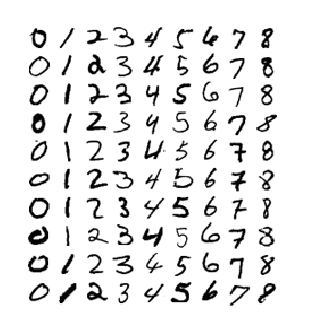

My Image:

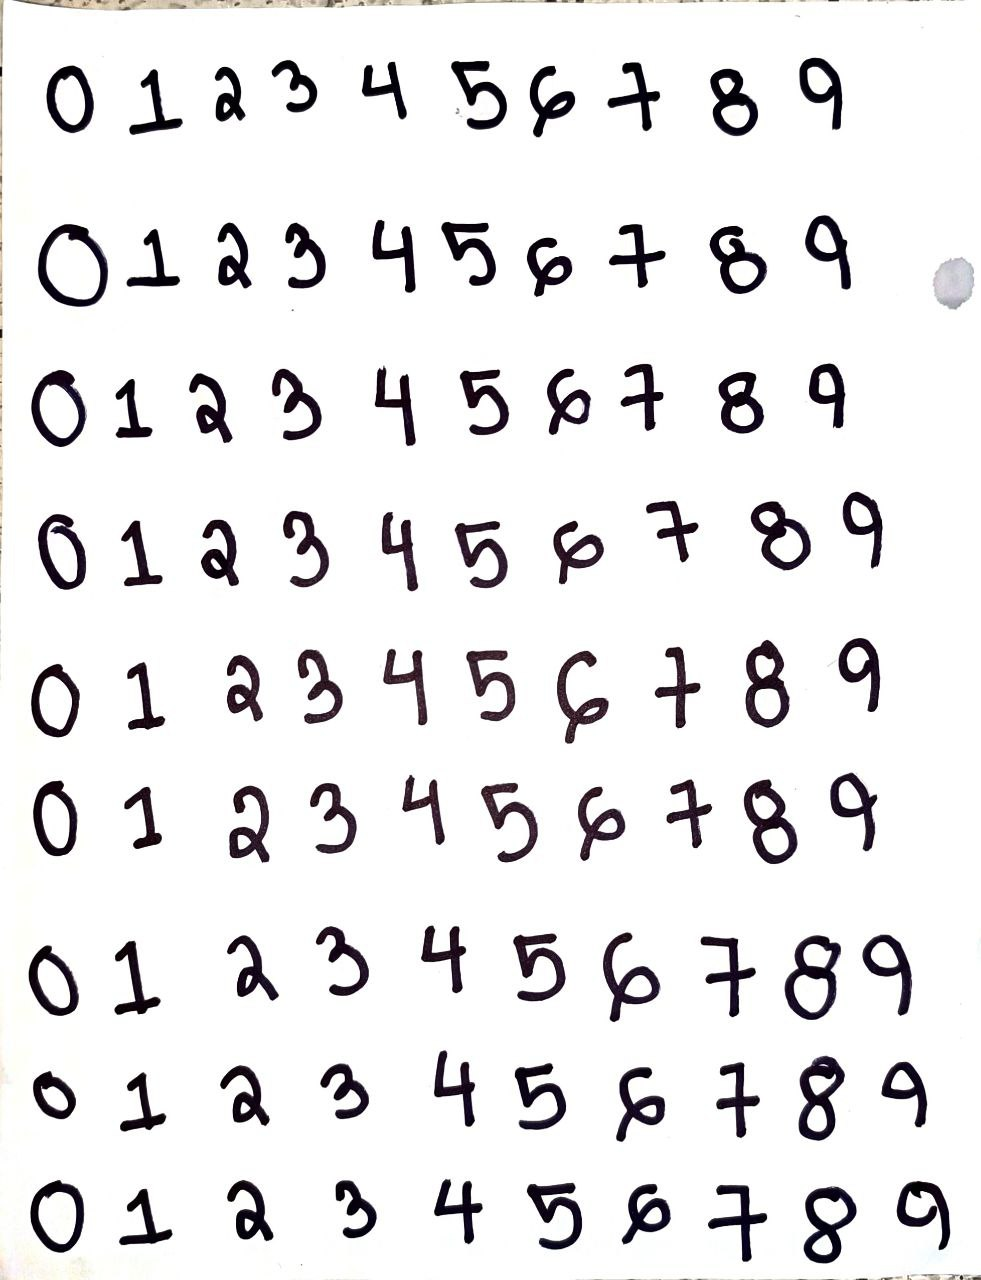

# Step 2: Rename the pictures according to their classes

Using any tool, crop the photos and so that we will get individual images of each digit.

# Step 3: Merge into one folder

Create a folder for each digit and store each image in that folder such that, we have 0(1), 0(2), 0(3), ... 0(n); based on the number of images we have obtained.

# Step 4: Resize the images

Using any tool, you must resize the pictures to 28x28 (similar to the size of individual images in the MNIST dataset).

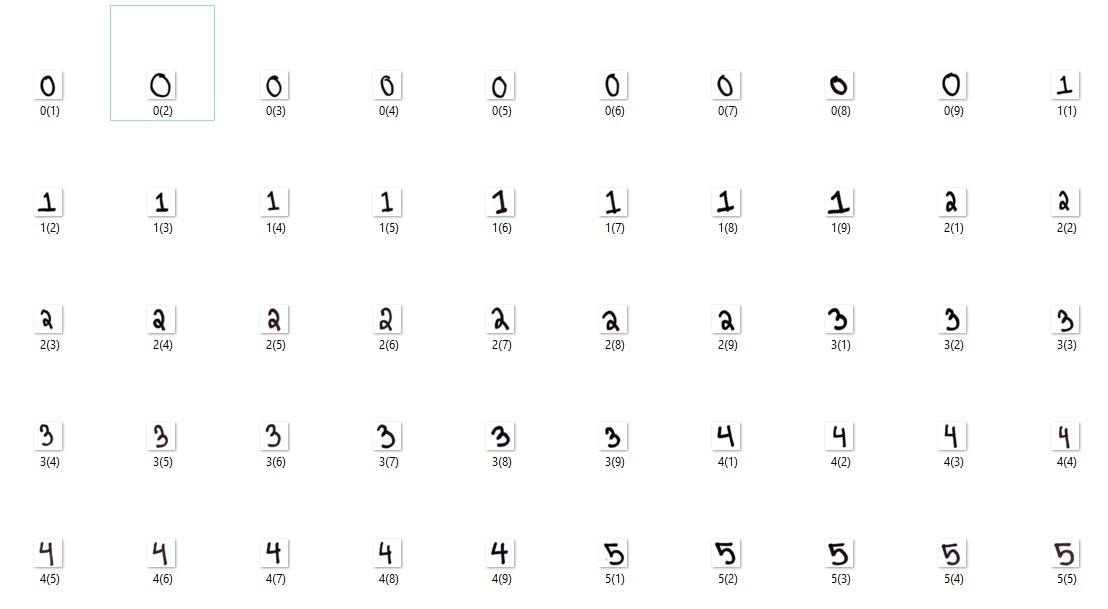

# Step 5: Convert all images into the same file format

Here is a neat trick to do this easily and efficiently. You could either choose .png or .jpg format.

1. Type cmd on the taskbar search field and jointly press Ctrl + Shift + Enter keys. If you come across UAC prompt, click Yes.

2. In the Command Prompt, first input the path of the new folder where you stored the files (images of Spotlight). To do so, type in `cd path_of_your_folder`

3. To Change the images to JPG format, type in the given batch command, and press Enter. `Ren *.* *.jpg`

4. To convert the images to PNG format, use the following batch command `Ren *.* *.png`

You don't have to convert the images to jpg and png, just choose one.

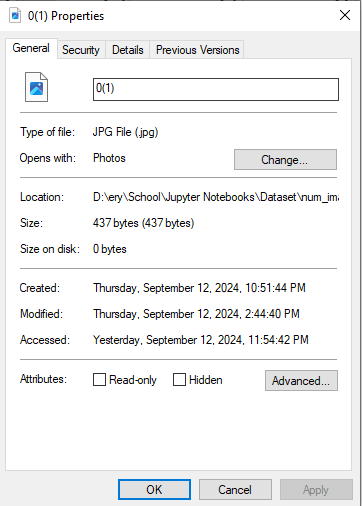

# Step 6: Convert images into .csv file

Run the following code to convert all the images into a CSV and label them accordingly.

In [36]:
from PIL import Image
import numpy as np
import sys
import os
import csv

myDir = "D:\ery\School\Jupyter Notebooks\Dataset/num_image"
# default format can be changed as needed
def createFileList(myDir, format='.jpg'):
    fileList = []
    print(myDir)
    labels = []
    names = []
    keywords = {'0(':0,
               '1(':1,
               '2(':2,
               '3(':3,
               '4(':4,
               '5(':5,
               '6(':6,
               '7(':7,
               '8(':8} # keys and values to be CHANGED.
    for root, dirs, files in os.walk(myDir, topdown=True):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
            for keyword in keywords:
                if keyword in name:
                    labels.append(keywords[keyword])
                else:
                    continue
            names.append(name)
    return fileList, labels, names

# load the original image
myFileList, labels, names  = createFileList(myDir)
i = 0
for file in myFileList:
    print(file)
    img_file = Image.open(file)
    # img_file.show()

# get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode

# Make image Greyscale
    img_grey = img_file.convert('L') # Change this to RGB if you wish to keep colored images.
#     img_grey.save('result.png')
#     img_grey.show()

# Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=int).reshape((height , width,))
    value = value.flatten()

    value = np.append(value,labels[i])
    i +=1

    print(value)
    # Replace groupN with group name i.e. _team5.
    with open("Handwriting_Data.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)

D:\ery\School\Jupyter Notebooks\Dataset/num_image
D:\ery\School\Jupyter Notebooks\Dataset/num_image\0(1).jpg
[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 254 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 254 249 253 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 254 253 254 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 254 255
 255 255 255 255 255 255 255 255 255 255 255 253 253 253 253 236 200 164
 146 200 244 254 253 253 255 254 255 255 255 255 255 255 255 255 255 255
 255 255 255 254 254 244 164  63  27   1   1  27 105 224 253 253 255 254
 254 255 255 255 255 255 255 255 255 255 255 255 254 253 244 136  17   1
   1   1   1   1   1 123 249 255 255 254 254 255 255 255 255 255 255 255
 255 255 255 255 254 249 136   7   1   1   7  63  88  17   1  27 200 255
 255 255 255 25

D:\ery\School\Jupyter Notebooks\Dataset/num_image\8(8).jpg
[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 254 255 255 254 246 237 227
 230 247 253 255 255 255 255 255 255 255 255 255 255 255 255 255 254 255
 255 255 252 250 231 191 147 109  81  62  64  92 119 162 223 252 253 255
 255 254 255 255 255 255 255 255 255 254 254 254 253 196 107  66  34  28
  24  17  13  15  18  19  75 200 253 255 255 254 255 255 255 255 255 253
 251 254 254 245 205  99  41  17  27  70 101  96  61  23  16  14  20  70
 191 252 252 251 254 255 255 255 255 252 251 231 165 100  53  21  15  11
  13  21  27  34  35  16  11  10  14  17  48 166 245 251 254 255 254 255
 254 253 204  91  29  14   9   7   9   8   5   4   4   6   6   8   8   8
  19  13  10  32 151 248 254 255 253 254 255 222  85  23  12  14 

You are tasked with debugging the code. Make changes where possible to optimize for your solution.

**What changes did you make to the code and why?**

# Step 7: Tweak the .csv file

1. Scroll to the end, click on an empty cell and use the following Excel formula to concatenate the pixel values.
```
=TEXTJOIN(" ", TRUE, (A1:B1))
#replace B1 with last but one column name
```
2. Drag the formula to the remaining rows.
3. Copy that column values to the notepad. Re-copy them and paste them back. This way, you will retain the pixel values and not the formula.
4. Now select all cells except the labels and concatenated values and delete them.
5. Cut the remaining columns and paste them at the beginning of the sheet.
6. Name the columns accordingly.

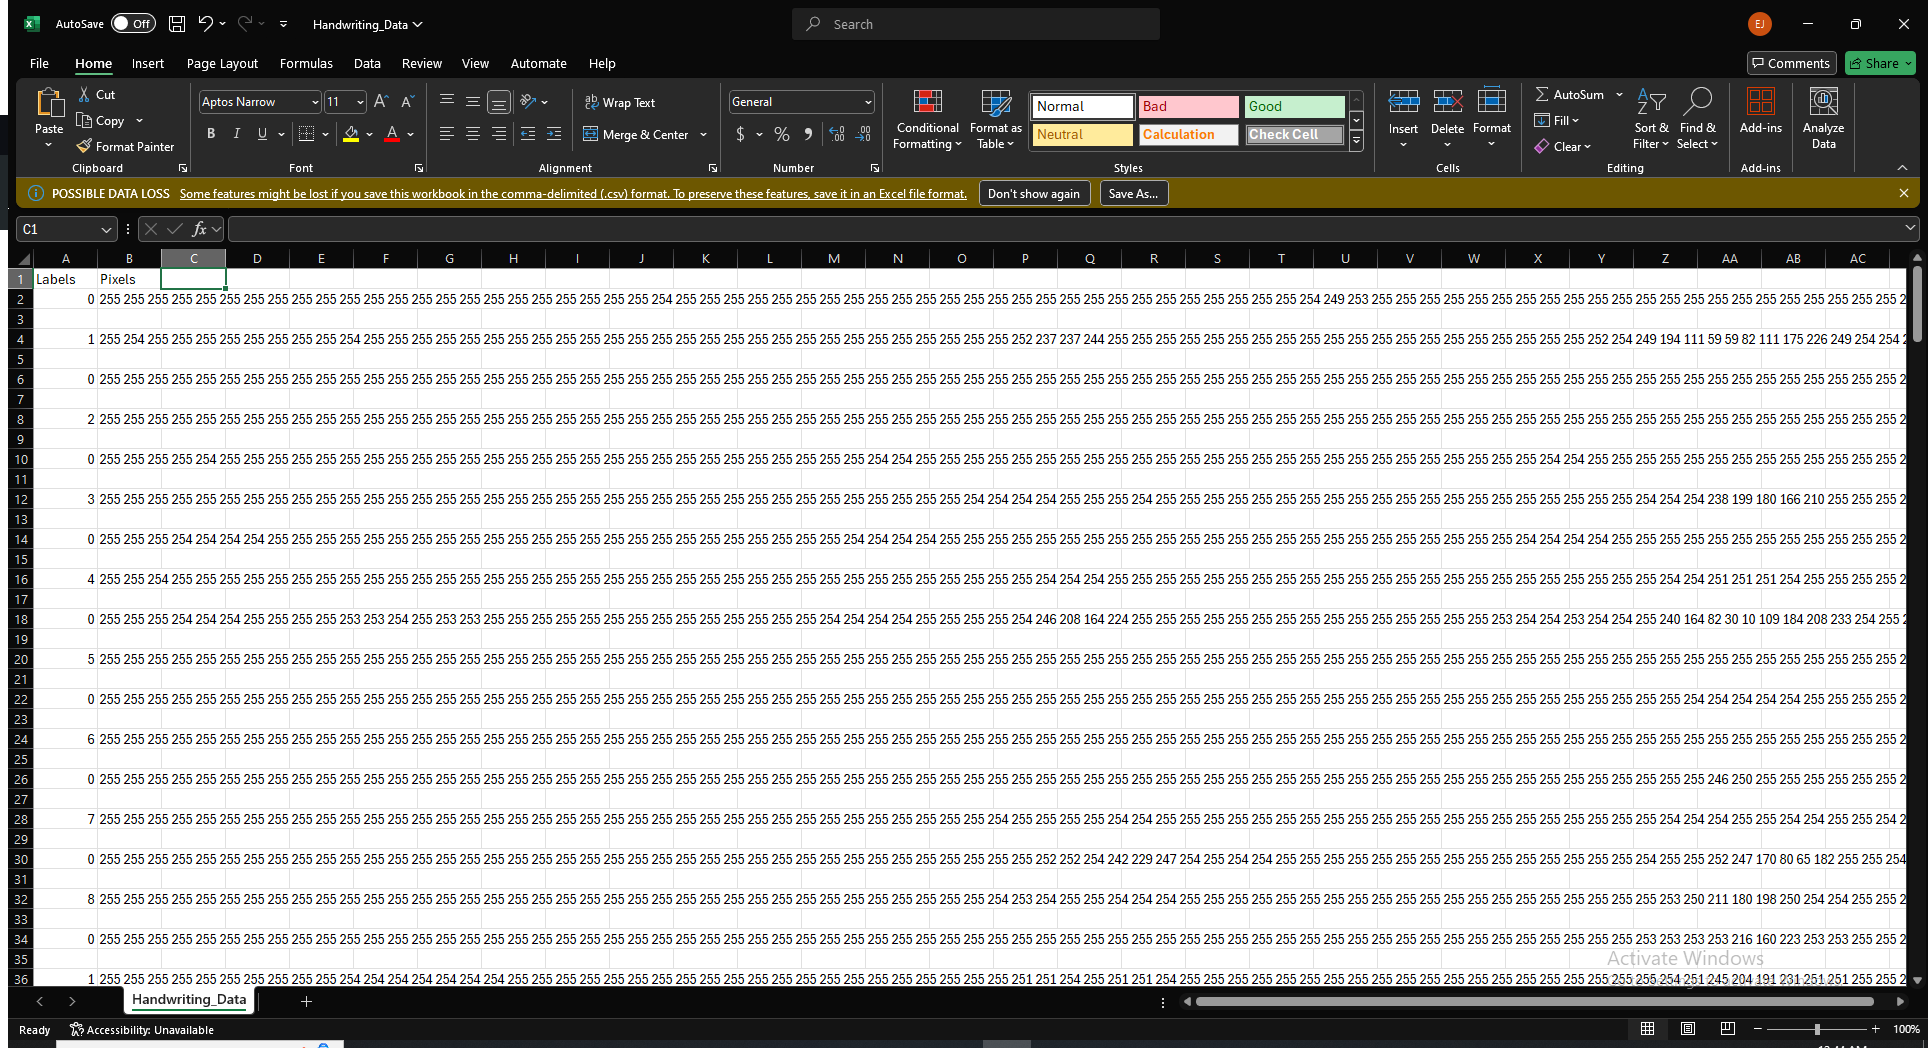

# Step. 8: Load the .csv file and generate image

Run the code below and configure, make sure you are able to show an image for each class.

(-0.5, 27.5, 27.5, -0.5)

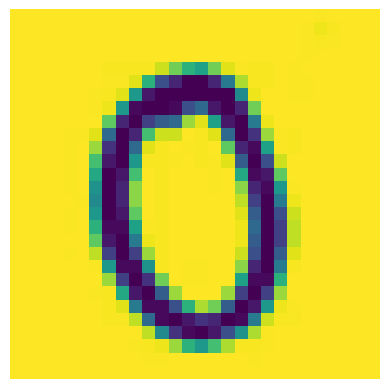

In [48]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

dataset_path = ''
image_size=(28,28) #add 3 if RGB image

def load():
    data = pd.read_csv("Handwriting_Data.csv")
    data.dropna(inplace=True)
    pixels = data['Pixels'].tolist()
    width, height= 28, 28 ,# add depth 3 if RGB image
    faces = []
    for pixel_sequence in pixels:
        face = [int(pixel) for pixel in pixel_sequence.split(' ')]
        face = np.asarray(face).reshape(width, height,) #add depth if RGB image
        a = face
        face = np.resize(face.astype('uint8'),image_size)
        faces.append(face.astype('float32'))
    faces = np.asarray(faces)
    A = faces
    faces = np.expand_dims(faces, -1)
    return faces, A

faces,A = load()
plt.imshow(A[0].astype("uint8"))
plt.axis('off')

Original Image


In [42]:
data = pd.read_csv("Handwriting_Data.csv")
data.dropna(inplace=True)

In [43]:
X = data.drop(columns='Labels')

In [44]:
X

,Pixels
0,255 255 255 255 255 255 255 255 255 255 255 25...
2,255 254 255 255 255 255 255 255 255 255 254 25...
4,255 255 255 255 255 255 255 255 255 255 255 25...
6,255 255 255 255 255 255 255 255 255 255 255 25...
8,255 255 255 255 254 255 255 255 255 255 255 25...
...,...
314,255 255 255 255 255 255 255 255 255 255 255 25...
316,255 255 255 255 255 255 255 253 253 254 255 25...
318,255 255 255 255 255 255 255 255 255 255 255 25...
320,255 255 255 255 255 255 255 255 255 255 255 25...


# Summary, Conclusions and Lessons Learned

the summary of this Exercise is we have gathered real life phenomenon or data and convert it to information that our computers can understand. In this case, we have wrote numbers on our papers and then compiled it in a file and resize it on a specified pixels per picture, after that we have run some codes and convert every pixel on our handwriting in to values based on the color of the picture, after converting we stored it in a csv file so that we can make it a dataframe, and then we plotted it using matplotlib to check if we have successfully converted the information. In this actvity, I've concluded that using python libraries can help us in making the conversion of the data, and learning the file I/O are also essential in making a customize dataset.